This notebook presents a python code example for the calculation of the ESG score based on the method introduced in the paper **Sustainable Entrepreneurship:
Identification of Startups' ESG Properties from Text Data with Machine Learning**

We developed an easy-to-use web app where you can paste text and immediately obtain ESG scores for the text in the https://sustainableentrepreneurship.org/



# 1 - Imports and methods

In [1]:
# import required packages
import pandas as pd
import numpy as np
import re
from cleantext import clean # install via: pip install clean-text

#import the word-lists
ESGwordlist= pd.read_csv('https://www.dropbox.com/s/e28dihonntg8o82/expanded_dict.csv?dl=1')
e = [x.replace('_',' ') for x in list(ESGwordlist['E'].dropna())]
s = [x.replace('_',' ') for x in list(ESGwordlist['S'].dropna())]
g = [x.replace('_',' ') for x in list(ESGwordlist['G'].dropna())]

In [2]:
# required methods

def get_ngrams(s, n):
    '''
    tokenize an input text 
    source: https://albertauyeung.github.io/2018/06/03/generating-ngrams.html
    '''
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]


def cleaner(txt):    
    '''
    Clean the input text
    '''
    return clean(
        txt,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=True,                # replace all numbers with a special token
        no_digits=True,                 # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="en"                       # set to 'de' for German special handling
        )


def ESG_Calculator(text):
    '''
    return the ESG scores for an input text
    '''
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in e]
        e_Freq=sum(counts) 
        e_Diversity = len([x for x in counts if x!=0])    
        counts= [text.count(x) for x in s]
        s_Freq=sum(counts) 
        s_Diversity = len([x for x in counts if x!=0])            
        counts= [text.count(x) for x in g]
        g_Freq=sum(counts) 
        g_Diversity = len([x for x in counts if x!=0])    
        esg_Diversity= e_Diversity/len(e) +s_Diversity/len(s) +g_Diversity/len(g)
        return (esg_Diversity,(e_Diversity/len(e)),(s_Diversity/len(s)),(g_Diversity/len(g)))
    except Exception as ex:
        print(ex)
        return (0,0,0,0)

# 2- ESG calculation 

In [3]:
# An example
# text from copy paste of the https://www.un.org/sustainabledevelopment/sustainable-development-goals/
text='''
Take Action for the Sustainable Development Goals
The Sustainable Development Goals are the blueprint to achieve a better and more sustainable future for all. They address the global challenges we face, including poverty, inequality, climate change, environmental degradation, peace and justice. Learn more and take action.


Watch the global broadcast ‘Nations United”
On the 75th anniversary of the United Nations and the 5th anniversary of the adoption of the Sustainable Development Goals – in the midst of a pandemic radically transforming our economies and societies – this 30-minute film tells the story of the world as it is, as it was, and as it could be. Directed by renowned film maker Richard Curtis and produced by the documentary film company 72 Films, “Nations United” presents the facts, data, and opportunities we have as a human family to reimagine and reshape the future. The film will be broadcast on numerous television channels, radio stations and streaming services around the world.

MEDIA ADVISORY PRESS RELEASE

Goal 1: No Poverty
GOAL 1: NO POVERTY
Economic growth must be inclusive to provide sustainable jobs and promote equality.

READ MORE ABOUT GOAL 1

Goal 2: Zero Hunger
GOAL 2: ZERO HUNGER
The food and agriculture sector offers key solutions for development, and is central for hunger and poverty eradication.

READ MORE ABOUT GOAL 2

Goal 3: Good Health and Well-Being
GOAL 3: GOOD HEALTH AND WELL-BEING
Ensuring healthy lives and promoting the well-being for all at all ages is essential to sustainable development.

READ MORE ABOUT GOAL 3

Goal 4: Quality Education
GOAL 4: QUALITY EDUCATION
Obtaining a quality education is the foundation to improving people’s lives and sustainable development.

READ MORE ABOUT GOAL 4

Goal 5: Gender Equality
GOAL 5: GENDER EQUALITY
Gender equality is not only a fundamental human right, but a necessary foundation for a peaceful, prosperous and sustainable world.

READ MORE ABOUT GOAL 5

Goal 6: Clean Water and Sanitation
GOAL 6: CLEAN WATER AND SANITATION
Clean, accessible water for all is an essential part of the world we want to live in.

READ MORE ABOUT GOAL 6

Goal 7: Affordable and Clean Energy
GOAL 7: AFFORDABLE AND CLEAN ENERGY
Energy is central to nearly every major challenge and opportunity.

READ MORE ABOUT GOAL 7

Goal 8: Decent Work and Economic Growth
GOAL 8: DECENT WORK AND ECONOMIC GROWTH
Sustainable economic growth will require societies to create the conditions that allow people to have quality jobs.

READ MORE ABOUT GOAL 8

Goal 9: Industry, Innovation, and Infrastructure
GOAL 9: INDUSTRY, INNOVATION, AND INFRASTRUCTURE
Investments in infrastructure are crucial to achieving sustainable development.

READ MORE ABOUT GOAL 9

Goal 10: Reduced Inequalities
GOAL 10: REDUCED INEQUALITIES
To reduce inequalities, policies should be universal in principle, paying attention to the needs of disadvantaged and marginalized populations.

READ MORE ABOUT GOAL 10

Goal 11: Sustainable Cities and Communities
GOAL 11: SUSTAINABLE CITIES AND COMMUNITIES
There needs to be a future in which cities provide opportunities for all, with access to basic services, energy, housing, transportation and more.

READ MORE ABOUT GOAL 11

Goal 12: Responsible Consumption and Production
GOAL 12: RESPONSIBLE CONSUMPTION AND PRODUCTION
Responsible Production and Consumption

READ MORE ABOUT GOAL 12

Goal 13: Climate Action
GOAL 13: CLIMATE ACTION
Climate change is a global challenge that affects everyone, everywhere.

READ MORE ABOUT GOAL 13

Goal 14: Life Below Water
GOAL 14: LIFE BELOW WATER
Careful management of this essential global resource is a key feature of a sustainable future.

READ MORE ABOUT GOAL 14

Goal 15: Life on Land
GOAL 15: LIFE ON LAND
Sustainably manage forests, combat desertification, halt and reverse land degradation, halt biodiversity loss

READ MORE ABOUT GOAL 15

Goal 16: Peace, Justice and Strong Institutions
GOAL 16: PEACE, JUSTICE AND STRONG INSTITUTIONS
Access to justice for all, and building effective, accountable institutions at all levels.

READ MORE ABOUT GOAL 16

Goal 17: Partnerships
GOAL 17: PARTNERSHIPS
Revitalize the global partnership for sustainable development.

READ MORE ABOUT GOAL 17

SDG RESOURCES ACROSS THE UN
Sustainable Development Knowledge Platform

United Nations Sustainable Development Group


'''

In [6]:
ESG = ESG_Calculator(text)

In [7]:
print('''
        ESG Score: {0}  \n
        Environmental Score: {1}  \n
        Social Score: {2} \n
        Governance Score {3} 
        '''.format(np.round(ESG[0], 3),np.round(ESG[1], 3),np.round(ESG[2], 3),np.round(ESG[3], 3)))


        ESG Score: 0.072  

        Environmental Score: 0.026  

        Social Score: 0.041 

        Governance Score 0.006 
        


# 3- Wordcloud of the ESG terms in the text

In [8]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud # install via: pip install wordcloud
from IPython.display import Image
ESGwordlist= pd.read_csv('https://www.dropbox.com/s/e28dihonntg8o82/expanded_dict.csv?dl=1')
e = [x.replace('_',' ') for x in list(ESGwordlist['E'].dropna())]
s = [x.replace('_',' ') for x in list(ESGwordlist['S'].dropna())]
g = [x.replace('_',' ') for x in list(ESGwordlist['G'].dropna())]

# definitaions
def ESG_WordCloud(text):
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in e]
        dic_e=dict(zip(e, counts))
        counts= [text.count(x) for x in s]
        dic_s=dict(zip(s, counts))
        counts= [text.count(x) for x in g]
        dic_g=dict(zip(g, counts))
    except Exception as ex:
        print(ex)
        dic_e={' ':1}
        dic_s={' ':1}
        dic_g={' ':1}
    mydictionary = {}
    mydictionary.update(dic_e)
    mydictionary.update(dic_s)
    mydictionary.update(dic_g)
    
    wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(mydictionary)
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

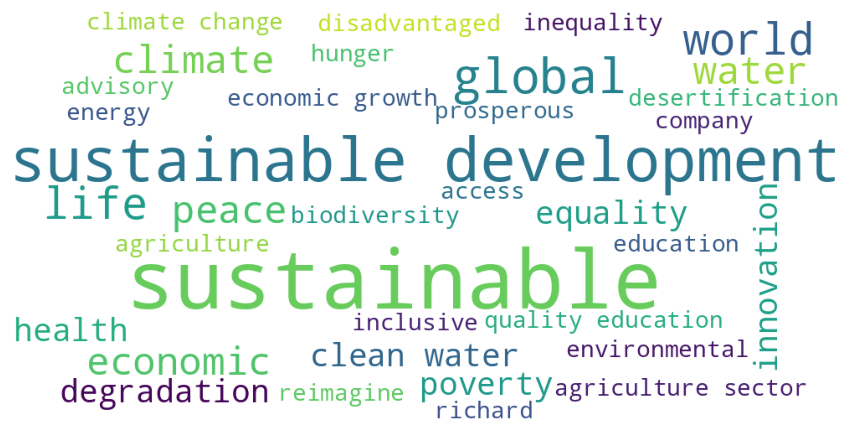

In [9]:
ESG_WordCloud(text)